## 사전 준비

In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# 기본 path
# /content/drive/Shared drives/[GH x RiderDash]/

In [5]:
# 필요한 package
import itertools
import pandas as pd
import numpy as np
import pickle
import warnings 
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

warnings.filterwarnings('ignore')

In [6]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/Shared drives/[GH x RiderDash]/Data/Preprocessing/total_df_store_add.csv',encoding='CP949', index_col=0)
product = pd.read_csv('/content/drive/Shared drives/[GH x RiderDash]/Data/raw_data/product.csv', index_col=0)
cars = pd.read_csv('/content/drive/Shared drives/[GH x RiderDash]/Data/Preprocessing/all_cars(modified).csv', index_col=0)
cars_info = pd.read_csv('/content/drive/Shared drives/[GH x RiderDash]/Data/Preprocessing/cars_info.csv', index_col=0)
store = pd.read_csv('/content/drive/Shared drives/[GH x RiderDash]/Data/Preprocessing/store_classification.csv', index_col=0)

## top N Store별 사용 모델 분포

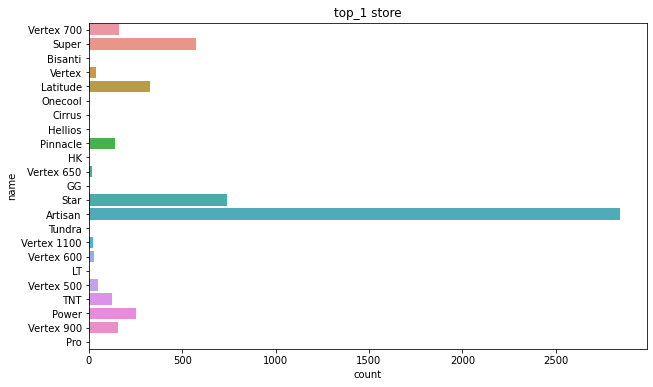

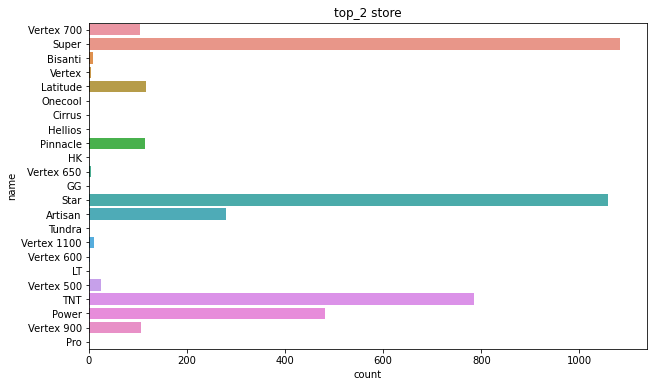

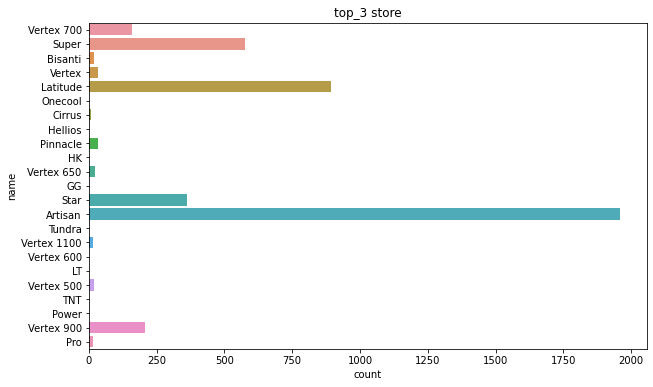

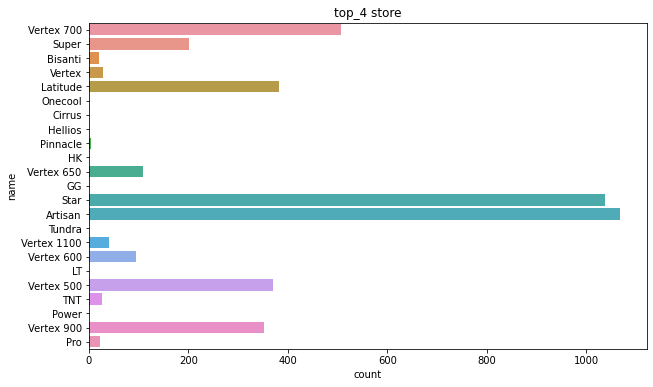

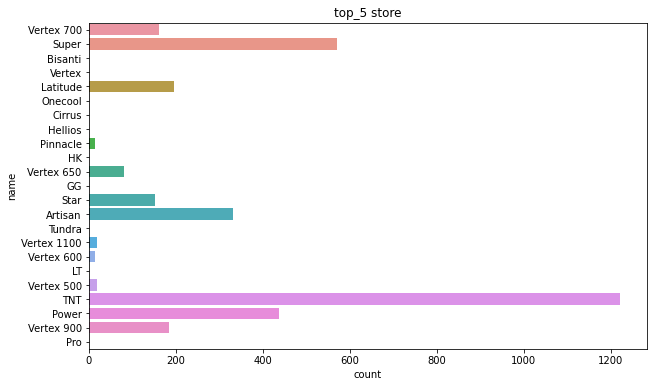

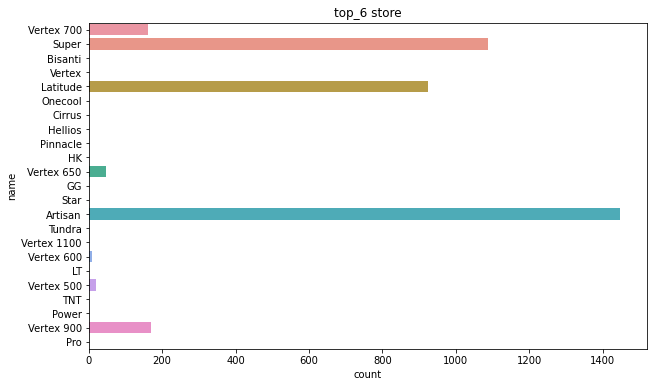

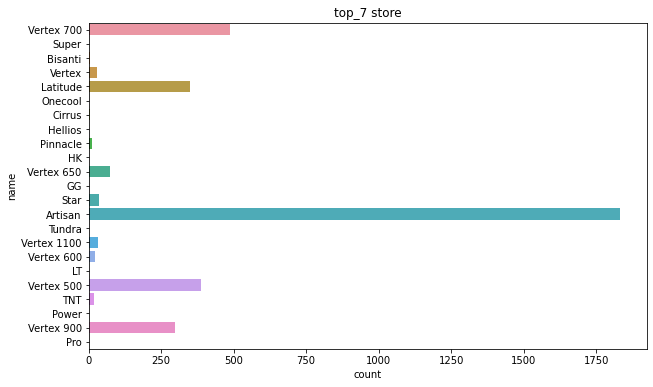

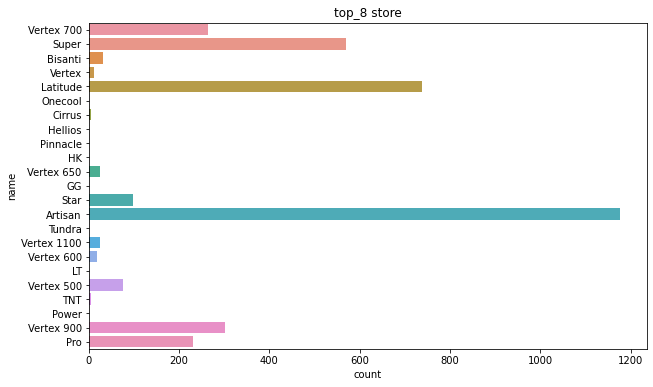

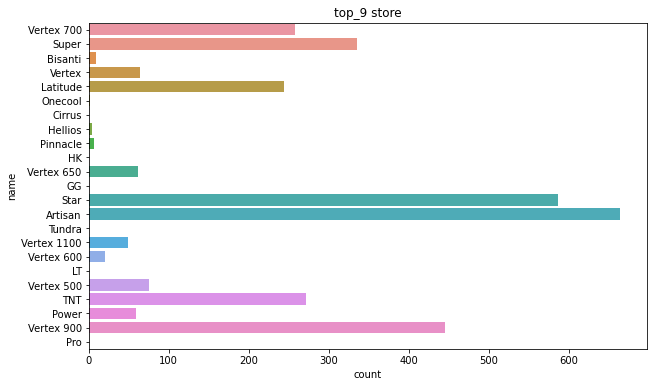

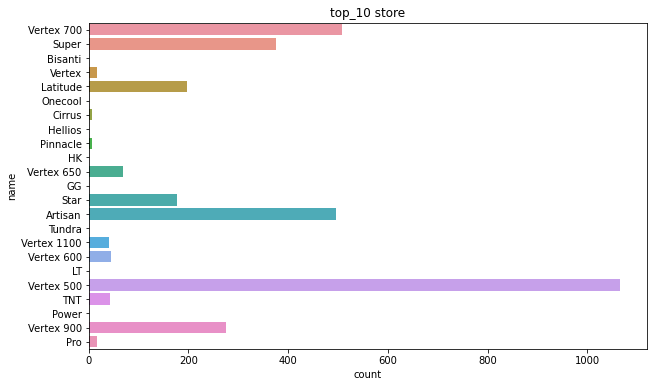

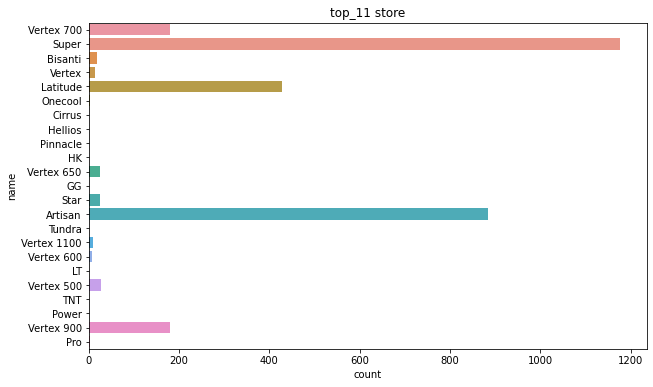

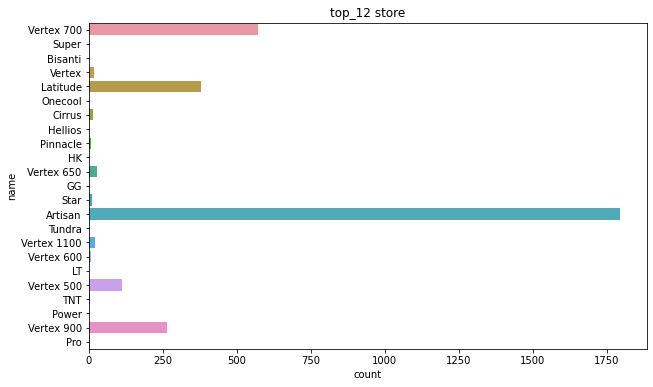

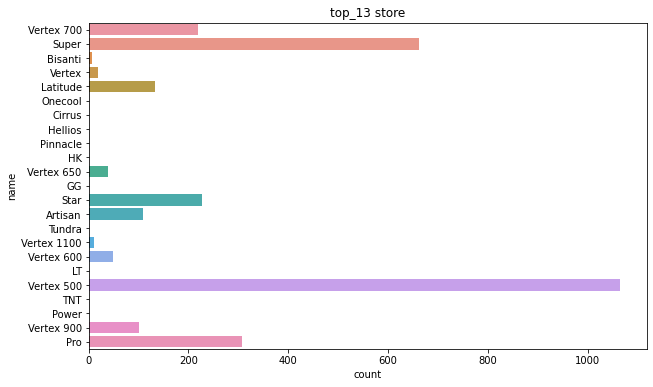

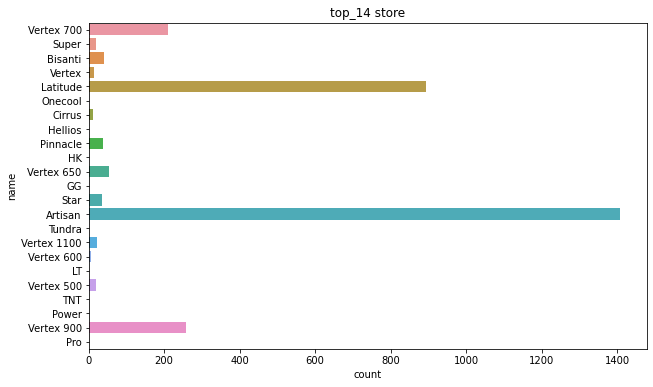

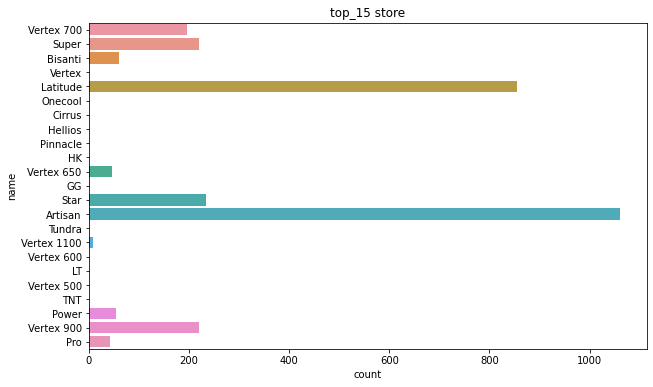

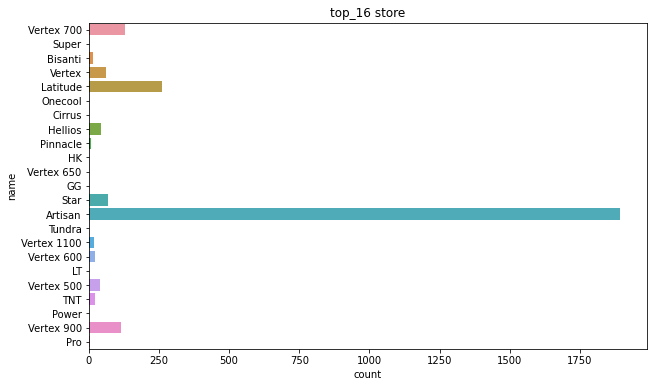

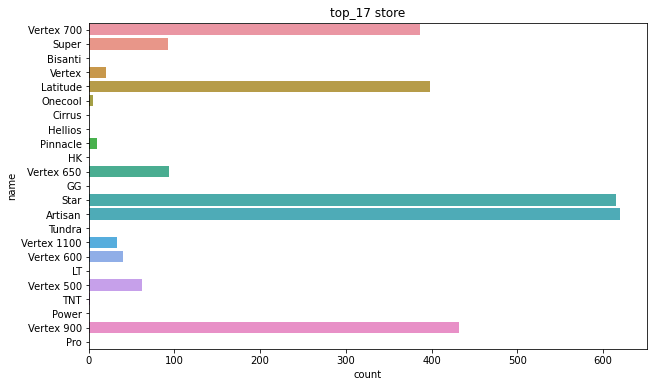

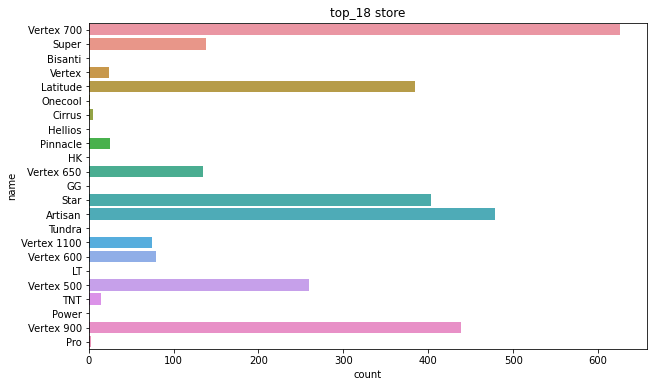

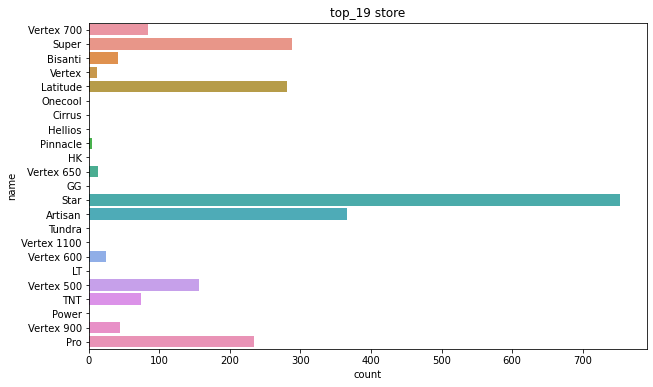

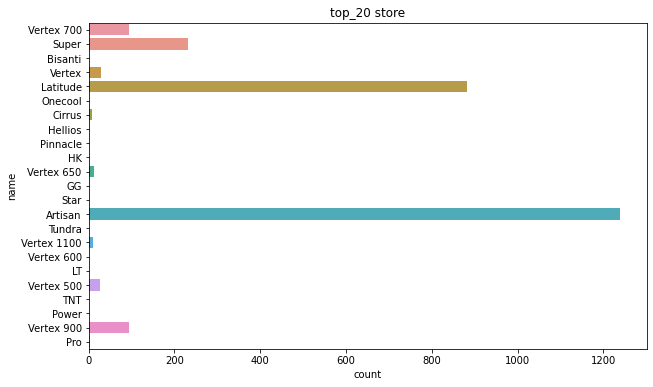

In [38]:
N = 20
topN = store.sort_values(by="works", ascending=False)[:N]
for s in range(N):
    store_code = list(topN.iloc[[s]]['store'])[0]
    top1_store = df[df['store']==store_code]
    comb = []
    for i in range(len(top1_store)):
        tab = top1_store.iloc[[i]]
        index = list(tab.index)[0]
        items = [tab.loc[index,'product_1'],tab.loc[index,'product_2'],tab.loc[index,'product_3'],tab.loc[index,'product_4'],tab.loc[index,'product_5'],tab.loc[index,'product_6']]
        #item = [x for x in items if x is not np.nan]
        comb.append(items)
    whole = []
    for item_list in comb:
        real = []
        for j in item_list:
            if np.isnan(j):
                continue
            else:
                real.append(product.loc[j,'name'])
        whole.append(list(set(real)))
    total = []
    for i in whole:
        total = total + i
    result = pd.DataFrame()
    name = []
    count = []
    for i in list(set(product['name'])):
        name.append(i)
        count.append(total.count(i))
    result['name'] = name
    result['count'] = count
    ax = sns.barplot(data=result, x='count', y='name')
    ax.set_title("top_%i" % (s+1) + " store")
    plt.show()

In [39]:
# topN 시공점에서 2종류 이상 제품 사용한 비율
N = 20
topN = store.sort_values(by="works", ascending=False)[:N]
for s in range(N):
    store_code = list(topN.iloc[[s]]['store'])[0]
    top1_store = df[df['store']==store_code]
    comb = []
    for i in range(len(top1_store)):
        tab = top1_store.iloc[[i]]
        index = list(tab.index)[0]
        items = [tab.loc[index,'product_1'],tab.loc[index,'product_2'],tab.loc[index,'product_3'],tab.loc[index,'product_4'],tab.loc[index,'product_5'],tab.loc[index,'product_6']]
        #item = [x for x in items if x is not np.nan]
        comb.append(items)
    whole = []
    for item_list in comb:
        real = []
        for j in item_list:
            if np.isnan(j):
                continue
            else:
                real.append(product.loc[j,'name'])
        whole.append(list(set(real)))
    
    num = 0
    for u in whole:
        if len(u) >= 2:
            num += 1
    print("top_%i에서" % (s+1),"2종류 이상의 제품을 사용한 비율 =", "%f" % (num/len(whole)))


top_1에서 2종류 이상의 제품을 사용한 비율 = 0.185784
top_2에서 2종류 이상의 제품을 사용한 비율 = 0.042341
top_3에서 2종류 이상의 제품을 사용한 비율 = 0.159968
top_4에서 2종류 이상의 제품을 사용한 비율 = 0.224631
top_5에서 2종류 이상의 제품을 사용한 비율 = 0.055228
top_6에서 2종류 이상의 제품을 사용한 비율 = 0.221906
top_7에서 2종류 이상의 제품을 사용한 비율 = 0.174959
top_8에서 2종류 이상의 제품을 사용한 비율 = 0.177638
top_9에서 2종류 이상의 제품을 사용한 비율 = 0.186030
top_10에서 2종류 이상의 제품을 사용한 비율 = 0.219861
top_11에서 2종류 이상의 제품을 사용한 비율 = 0.098747
top_12에서 2종류 이상의 제품을 사용한 비율 = 0.198516
top_13에서 2종류 이상의 제품을 사용한 비율 = 0.108638
top_14에서 2종류 이상의 제품을 사용한 비율 = 0.205452
top_15에서 2종류 이상의 제품을 사용한 비율 = 0.273261
top_16에서 2종류 이상의 제품을 사용한 비율 = 0.137205
top_17에서 2종류 이상의 제품을 사용한 비율 = 0.227534
top_18에서 2종류 이상의 제품을 사용한 비율 = 0.361683
top_19에서 2종류 이상의 제품을 사용한 비율 = 0.078672
top_20에서 2종류 이상의 제품을 사용한 비율 = 0.196355


In [41]:
# topN 시공점 추정 이름
N = 20
topN = store.sort_values(by="works", ascending=False)[:N]
for i in list(topN['store']):
    tab = df[df['store']==i]
    print(list(topN[topN['store']==i]['region'])[0], list(set(tab['predicted_name']))[0])

대전광역시 현대오일뱅크 충무주유소
광주광역시 띠띠빵빵광주썬팅네비게이션블랙박스
경기도 Unknown
경상북도 GS칼텍스 세왕주유소
광주광역시 현대자동차블루핸즈 용봉점
경기도 Unknown
경기도 Unknown
인천광역시 BMW 바바리안모터스 인천전시장
대전광역시 루마버텍스 대전오토월드점
대구광역시 현대자동차블루핸즈 본리점
경기도 Unknown
경기도 Unknown
대구광역시 루마버텍스 대구달서죽전점
서울특별시 기아오토큐 천호점
서울특별시 기아오토큐 도봉서비스센터
경기도 Unknown
전라북도 Unknown
대구광역시 Unknown
경상북도 Unknown
서울특별시 SK행복충전 복지장안충전소
